## Table of Contents

#### [1.Importing Libraries](#1)
#### [2.Reading Our Dataset](#2)
#### [3.Feature Engineering](#3)
#### [4.Categorical Feature Encoding](#4)
#### [5.Train-Test Split](#5)
#### [6.Dropping Correlated Features](#6)
#### [7.Feature Importance](#7)
#### [8.Model Building](#8)
#### [9.Results](#9)

### Importing Libraries<a id=1></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error,r2_score

pd.options.display.max_columns = None
pd.options.display.max_rows = None


import warnings
warnings.filterwarnings("ignore")

### Reading Our Dataset<a id=2></a>

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,55.20,5.0,2.35


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,55.20,5.0,2.35


In [6]:
df[df.duplicated()] 

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2356,Kolkata,2016,29000,Diesel,Manual,First,27.39,1248,74.0,5.0,6.50
3884,Hyderabad,2007,52195,Petrol,Manual,First,19.70,796,46.3,5.0,1.75


In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df[df.duplicated()] 

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


### Feature Engineering<a id=3></a>

#### Creating New 'Total_Year' Column

In [9]:
df.insert(2, 'Total_Year', (2021-df.Year))

In [10]:
df.drop("Year",axis=1,inplace=True)

In [11]:
df.head()

,Location,Total_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,11,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Pune,6,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Chennai,10,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Chennai,9,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Hyderabad,9,75000,LPG,Manual,First,21.10,814,55.20,5.0,2.35


In [12]:
df.Owner_Type = df.Owner_Type.apply(lambda x : x if x=='First' else 'Others')

### Categorical Feature Encoding<a id=4></a>

In [13]:
categorical_features = df.describe(include="object").columns

In [14]:
df_dummies = pd.get_dummies(df[categorical_features],drop_first=True)  ## initialize dummies 

In [15]:
df_dummies.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Others
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [16]:
df = df.drop(categorical_features,axis=1)

In [17]:
df = pd.concat([df_dummies,df],axis=1)

In [18]:
df.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Others,Total_Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,11,72000,26.60,998,58.16,5.0,1.75
1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,6,41000,19.67,1582,126.20,5.0,12.50
2,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,10,46000,18.20,1199,88.70,5.0,4.50
3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,9,87000,20.77,1248,88.76,7.0,6.00
4,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,9,75000,21.10,814,55.20,5.0,2.35


### Train-Test Split<a id=5></a>

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [21]:
print("X_train dimensions :",X_train.shape)
print("-"*50)
print("X_train dimensions :",X_test.shape)
print("-"*50)
print("X_train dimensions :",y_train.shape)
print("-"*50)
print("X_train dimensions :",y_test.shape)
print("-"*50)

X_train dimensions : (3920, 21)
--------------------------------------------------
X_train dimensions : (980, 21)
--------------------------------------------------
X_train dimensions : (3920,)
--------------------------------------------------
X_train dimensions : (980,)
--------------------------------------------------


In [22]:
corrmat = X_train.corr(method='pearson')

<AxesSubplot:>

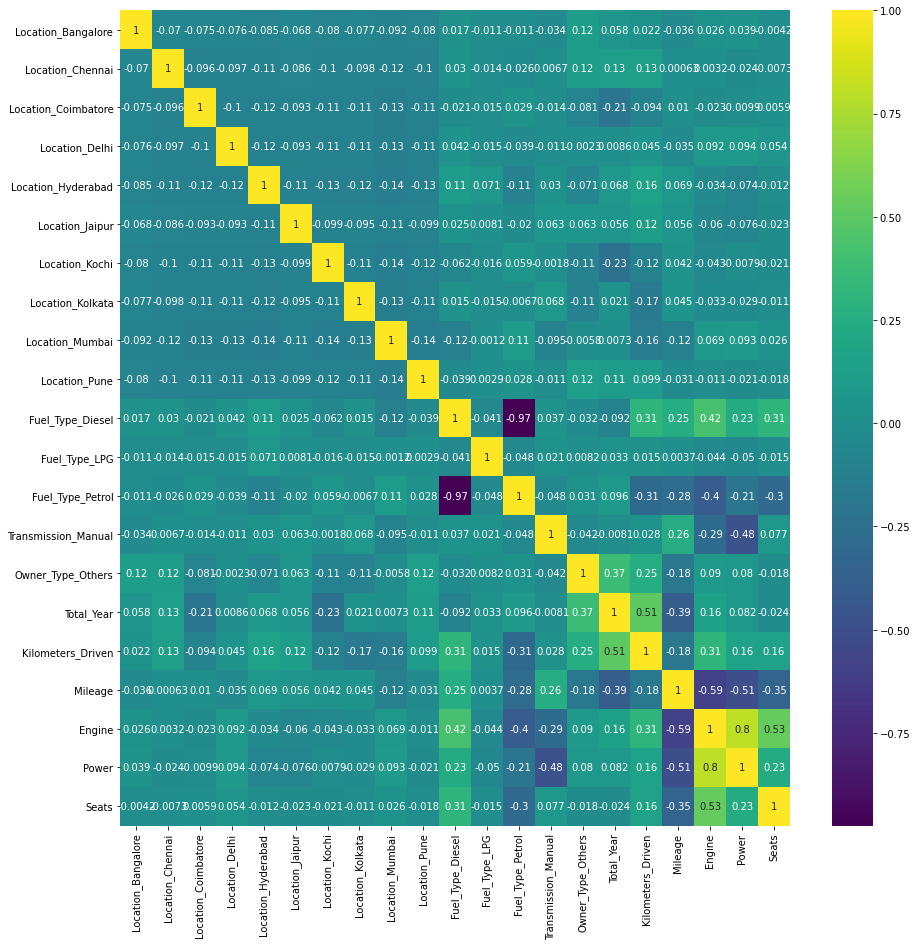

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(corrmat,annot=True,cmap="viridis")

### Dropping Correlated Features<a id=6></a>

In [24]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [25]:
corr_features = correlation(X_train,0.7)

0.974670375411072 Fuel_Type_Petrol Fuel_Type_Diesel
0.8022036978168581 Power Engine


In [26]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [27]:
X_train.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Others,Total_Year,Kilometers_Driven,Mileage,Power,Seats
3051,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7,69918,21.43,87.20,5.0
191,0,1,0,0,0,0,0,0,0,0,0,0,1,0,8,52000,20.77,88.76,7.0
2081,0,0,0,0,0,0,0,0,0,1,0,1,1,0,6,55000,22.00,55.00,5.0
2218,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,14061,21.90,88.76,5.0
1316,0,0,0,0,0,0,0,0,1,0,0,0,1,0,7,57000,24.20,98.60,7.0


#### We dropped "Engine" and  "Fuel_Type_Diesel columns"

### Feature Importance<a id=7></a>

In [29]:
from sklearn.ensemble import ExtraTreesRegressor

In [30]:
extra_tree  = ExtraTreesRegressor()

In [31]:
extra_tree.fit(X_train,y_train)

ExtraTreesRegressor()

Text(0.5, 1.0, 'Feature Importance')

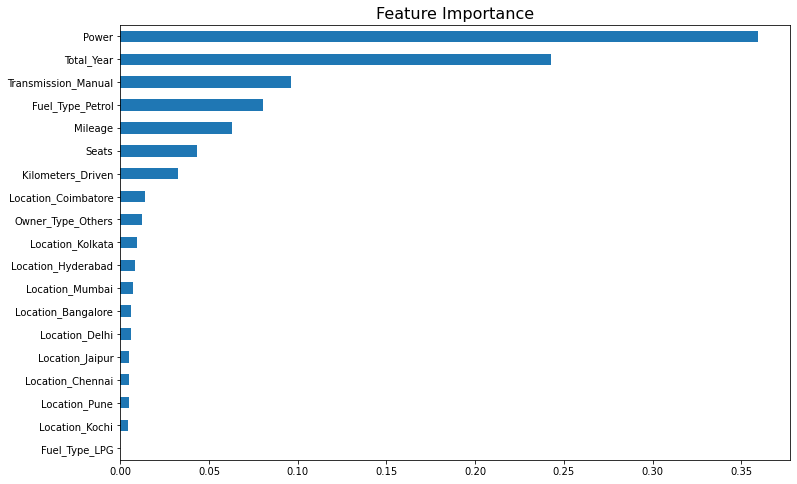

In [32]:
pd.Series(index=X_train.columns,data=extra_tree.feature_importances_).sort_values().plot(kind="barh",figsize=(12,8))
plt.title("Feature Importance",fontsize =16)

In [33]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest

In [34]:
best = SelectKBest(mutual_info_regression)

In [35]:
best.fit(X_train,y_train)

SelectKBest(score_func=<function mutual_info_regression at 0x000001F600FD35E0>)

In [42]:
Variable_Scores = pd.DataFrame(data={'Variables':X_train.columns,'Scores':best.scores_}).sort_values(by='Scores',ascending=False).reset_index().drop('index',axis=1)
Variable_Scores

,Variables,Scores
0,Power,0.530016
1,Mileage,0.313864
2,Total_Year,0.279415
3,Transmission_Manual,0.073589
4,Fuel_Type_Petrol,0.058484
5,Location_Coimbatore,0.055310
6,Seats,0.052843
7,Owner_Type_Others,0.050816
8,Location_Kochi,0.050412
9,Kilometers_Driven,0.048268


### Model Building<a id=8></a>

#### Random Forest Regressor

In [37]:
rf_model = RandomForestRegressor()

In [38]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
y_pred_rf = rf_model.predict(X_test)

In [40]:
mean_absolute_error(y_test,y_pred_rf)

0.8103387951895042

In [41]:
r2_score(y_test,y_pred_rf)

0.87904421522985

#### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr_model = LinearRegression()

In [43]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred_lr= lr_model.predict(X_test)

In [45]:
r2_score(y_test,y_pred_lr)

0.7519638848576627

#### Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso_model = Lasso(alpha=0.005)

In [48]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.005)

In [49]:
y_pred_lasso = lasso_model.predict(X_test)

In [50]:
r2_score(y_test,y_pred_lasso)

0.7518014578765759

#### XGBoost Regressor

In [51]:
from xgboost import XGBRFRegressor

In [52]:
xgb_model = XGBRFRegressor(n_estimators=500)

In [53]:
xgb_model.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=8, num_parallel_tree=500,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [54]:
y_pred_xgb = xgb_model.predict(X_test)

In [55]:
r2_score(y_test,y_pred_xgb)

0.8277128244477698

### Results

In [56]:
result = pd.DataFrame({'Models':['Random Forest','Linear Regression','Lasso Regression','XGBoost Regressor'],'R2 Score':[0.88,0.75,0.75,0.82]})

In [57]:
result

,Models,R2 Score
0,Random Forest,0.88
1,Linear Regression,0.75
2,Lasso Regression,0.75
3,XGBoost Regressor,0.82


- We will use  Random Forest Model to deploy our model.

### Saving Our Model

In [58]:
import pickle

In [59]:
pickle.dump(rf_model,open('model.pkl','wb'))